In [1]:
# Use GPU for Theano, comment to use CPU instead of GPU
# Tensorflow uses GPU by default
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN, device=gpu, floatX=float32"


In [2]:
# import necessary modules
import tensorflow
import time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(2017) 
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
import cv2

Using TensorFlow backend.


In [18]:
# load pre-trained model
model = VGG19(weights='imagenet', include_top=True)
# display model layers
model.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

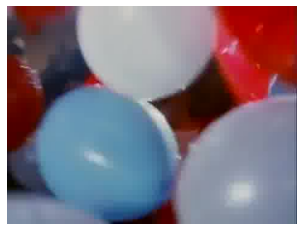

In [12]:
img_disp = cv2.imread('../data/000000089/image-002298.jpg')
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
plt.imshow(img_disp)
plt.axis("off")  
plt.show()

In [5]:
from IPython.display import display 
import PIL

In [45]:
# pre-process the image
img = image.load_img('../data/000000089/image-002298.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# predict the output 
preds = model.predict(img)
# decode the prediction
pred_class = decode_predictions(preds, top=3)[0]
print(pred_class)
print("Predicted Class: %s"%pred_class[0][1])
print("Confidance: %s"%pred_class[0][2])
print("Predicted Class: %s"%pred_class[1][1])
print("Confidance: %s"%pred_class[1][2])
print("Predicted Class: %s"%pred_class[2][1])
print("Confidance: %s"%pred_class[2][2])


[('n03942813', 'ping-pong_ball', 0.546745), ('n02782093', 'balloon', 0.31687957), ('n03720891', 'maraca', 0.033311386)]
Predicted Class: ping-pong_ball
Confidance: 0.546745
Predicted Class: balloon
Confidance: 0.31687957
Predicted Class: maraca
Confidance: 0.033311386


In [51]:
dir = '../data/000000089'

predictions = []
for frame in os.listdir(dir):
    img = image.load_img(os.path.join(dir,frame), target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # predict the output 
    preds = model.predict(img)
    predictions.append(decode_predictions(preds, top=3)[0])

In [ ]:
base_model = VGG19(weights='imagenet')

In [ ]:
img = image.load_img('../data/000000089/image-002298.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [18]:
model = Model(base_model.input, base_model.get_layer('fc2').output)
# obtain the outpur of fc2 layer
fc2_features = model.predict(img)
print("Feature vector dimensions: ",fc2_features.shape)


Feature vector dimensions:  (1, 4096)
